<a href="https://colab.research.google.com/github/Pedro-A-D-S/pan_card_tampering/blob/main/PAN_Card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PAN Card Tempering Detection**

The porpose of this project is to detect tempering of PAN card using computer vision. This project will help different organizations detection whether the id i.e. the PAN card provided to them by their employees or customers or anyone is original or not.

For this project we will calculate structural similarity of original PAN card and the PAN card uploaded by user.

In [42]:
# imports

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [43]:
!mkdir pan_card_tempering
!mkdir pan_card_tempering/image

In [44]:
# open image and display

original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream = True).raw)

**Loading original and user provided images**

In [45]:
# File format of the source file
print('Original image format: ', original.format)
print('Tampered image format: ', tampered.format)

# Image size in pixels. The size is given as a 2-tuple (width, height)
print('Original image format: ', original.size)
print('Tampered image format: ', tampered.size)

Original image format:  JPEG
Tampered image format:  PNG
Original image format:  (1200, 800)
Tampered image format:  (282, 179)


The original and tempered images do not come in the same format, so it's necessary to convert them to the same format.

In [46]:
# Resize Image
original = original.resize((250, 160))
print(original.size)

# Save images
original.save('/content/pan_card_tampering/image/original.png')


(250, 160)


In [47]:
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('/content/pan_card_tampering/image/tampered.png')

(250, 160)


We can also change the tampered image format:

In [48]:
tampered = Image.open('/content/pan_card_tampering/image/tampered.png')
tampered.save('/content/pan_card_tampering/image/tampered.png')

We can also visualize the original and the tampered image:

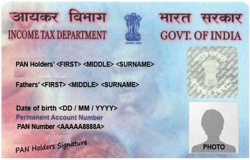

In [49]:
original

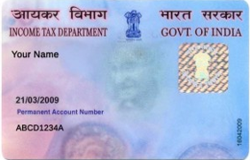

In [50]:
tampered

Using opencv to load the images:

In [54]:
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

Converting images to greyscale:

In [57]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

The converting process to grayscale is important because in imagine processing, many applications doesn't help us in identifying the important. Edges of the coloured images also coloured images are complex to understand by the machine because they have 3 channels while grayscale has only 1.

In [58]:
# Compute the Structural Similarity Index (SSIM) between two images, ensuring that the different image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype('uint8')
print('SSIM: {}'.format(score))

SSIM: 0.31678790332739426


The lower the SSIM score, the lower the similarity.

In [59]:
# calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [60]:
# loop over the contours

for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + w), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + w), (0, 0, 255), 2)

Original Format Image: 


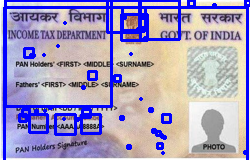

In [61]:
# Display the original image with contour
print('Original Format Image: ')
Image.fromarray(original)

Tampered Image: 


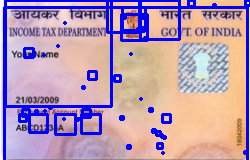

In [62]:
# Display the tampered image with contour
print('Tampered Image: ')
Image.fromarray(tampered)

Different Image


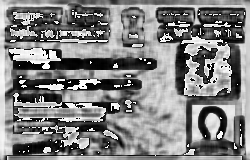

In [63]:
# display difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image:


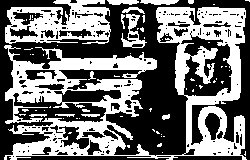

In [65]:
# display threshold image with white
print('Threshold Image:' )
Image.fromarray(thresh)

# Summary

Finding out structural similarity of the image helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

As, our SSIM is near 31.2%, we can say that the image user provided is fake or tampered.

Finally, we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.